Load necessary modules

In [1]:
#%matplotlib notebook
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

Load energy efficiency data set

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx

data_df = pd.read_excel('ENB2012_data.xlsx')
data = np.array(data_df)

N = data.shape[0]
X = data[:,:8]
y = data[:,8]

Fit linear regression model and compute training error

In [3]:
lin_regr = linear_model.LinearRegression()
lin_regr.fit(X, y)
y_lin_pred = lin_regr.predict(X)
training_error_lin = np.sum((y_lin_pred-y)**2)/N

Fit kNN regression model (for all $k$) and compute training errors

In [4]:
training_error_kNN = np.zeros(N)

for k in range(N):
	neigh = KNeighborsRegressor(n_neighbors=k+1)
	neigh.fit(X, y)
	y_neigh_pred = neigh.predict(X)
	training_error_kNN[k] = np.sum((y_neigh_pred-y)**2)/N

Plot training errors for changing parameter $k$

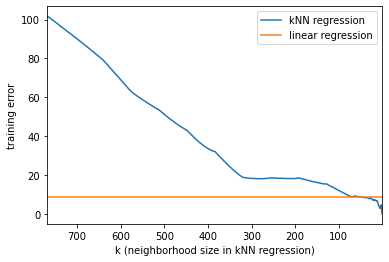

In [5]:
#plt.rcParams.update({'font.size': 18})
plt.figure()
plt.xlim(N,1)
plt.plot(np.linspace(1,N,N),training_error_kNN, label="kNN regression")
plt.plot(np.linspace(1,N,N),training_error_lin*np.ones(N), label="linear regression")
plt.xlabel("k (neighborhood size in kNN regression)")
plt.ylabel("training error")
plt.legend()
plt.show()